In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as XGB
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df = pd.read_csv("./data/cardio_train.csv",sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


id             0.003799
age            0.238159
gender         0.008109
height        -0.010821
weight         0.181660
ap_hi          0.054475
ap_lo          0.065719
cholesterol    0.221147
gluc           0.089307
smoke         -0.015486
alco          -0.007330
active        -0.035653
Name: cardio, dtype: float64


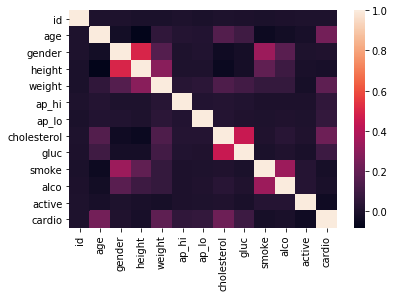

In [5]:
correlations = df.corr()['cardio'].drop('cardio')
print(correlations)
sns.heatmap(df.corr())

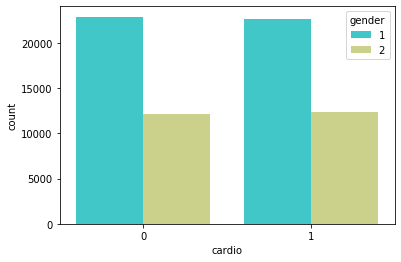

In [6]:

sns.countplot(x='cardio',data=df,hue='gender',palette='rainbow')


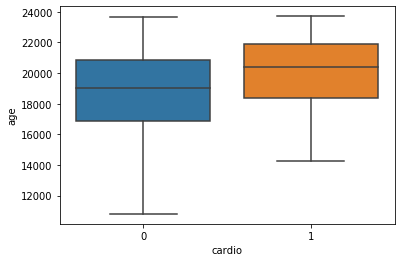

In [7]:

sns.boxplot(x='cardio',y='age',data=df)

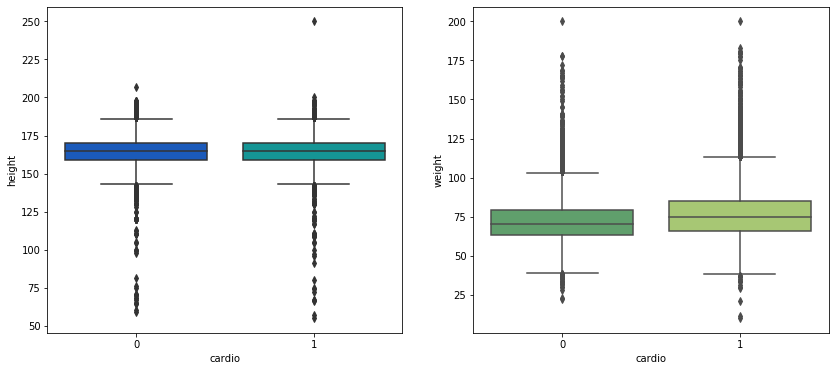

In [8]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='height',data=df,palette='winter')
plt.subplot(1,2,2)
sns.boxplot(x='cardio',y='weight',data=df,palette='summer')

In [23]:
x=df.drop(["cardio", 'age', 'gender', 'id', 'active'],axis=1)
y=df["cardio"]
y=y.astype(int)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.2,shuffle = True)


In [24]:
Classifiers = []
GNB = GaussianNB()
GNB.fit(train_x,train_y)
y_pred_NB = GNB.predict(test_x)
Classifiers.append(y_pred_NB)

In [25]:

knn=KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_x,train_y)
y_pred_KN = knn.predict(test_x)
Classifiers.append(y_pred_KN)

In [26]:
DTR = DecisionTreeClassifier()
DTR.fit(train_x,train_y)
y_pred_Deci = DTR.predict(test_x)
Classifiers.append(y_pred_Deci)

In [53]:
XGBC = XGB.XGBClassifier()
XGBC.fit(train_x,train_y)
y_pred_XGB = XGBC.predict(test_x)
Classifiers.append(y_pred_XGB)

In [54]:
Class = ['Naive Bayes' , 'KNeighbors' ,'DecisionTree', 'RandomForest' , 'XGBoost']
score=list()
a=0
index=0
for pred in range(len(Classifiers)):
    if a < accuracy_score(test_y,Classifiers[pred]):
        a = accuracy_score(test_y,Classifiers[pred])
        index=pred
        
    print("accuracy of {} classifier is {:.2f}%".format(Class[pred],accuracy_score(test_y,Classifiers[pred])*100))
    
print("\nbest classifier is {} and the accuracy is {:.2f}%".format(Class[index],a*100))

accuracy of Naive Bayes classifier is 58.32%
accuracy of KNeighbors classifier is 67.65%
accuracy of DecisionTree classifier is 65.16%
accuracy of RandomForest classifier is 72.33%
accuracy of XGBoost classifier is 72.33%


IndexError: list index out of range

In [55]:
import pickle 

pickle.dump(XGBC, open('./models/XGBC_cardiac.pickle', 'wb'))

In [16]:
params = train_x.columns


In [21]:
XGBC.predict_proba(test_x)

array([[0.2789716 , 0.7210284 ],
       [0.85105205, 0.14894795],
       [0.46489602, 0.535104  ],
       ...,
       [0.14714181, 0.8528582 ],
       [0.62686956, 0.3731304 ],
       [0.20539153, 0.7946085 ]], dtype=float32)

In [60]:
type(test_x)

pandas.core.frame.DataFrame

In [41]:
df.id.values[len(df) -1]

99999

In [43]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [46]:
df.id.value_counts()

2047     1
97146    1
78707    1
68468    1
66421    1
        ..
48701    1
46652    1
34362    1
38456    1
0        1
Name: id, Length: 70000, dtype: int64

In [47]:
a = [1, 2 ,3 ,4 ]

In [48]:
str(a)

'[1, 2, 3, 4]'

In [57]:
idx = 1
data = df.loc[df['id'] == idx]
data = data.drop(["cardio", 'age', 'gender', 'id', 'active'],axis=1)
risk = XGBC.predict_proba(data)

In [58]:
risk

array([[0.14536226, 0.85463774]], dtype=float32)

In [59]:
df.loc[df['id'] == idx]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1


In [62]:
test_x.index

Int64Index([65237, 35157, 23145, 13573, 16899, 20849, 36046, 47770, 13340,
            45630,
            ...
            62288, 18301, 47524, 23715, 13680, 52225, 55013, 27731, 66603,
            66620],
           dtype='int64', length=14000)